In [30]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
batch_size = 256
n_batch = mnist.train.num_examples // batch_size

# weight initialization
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

# bias initialization
def bias_variable(shape):
    return tf.Variable(tf.constant(0.1, shape=shape))

# convolutional layer
def conv2d(x, W):
    # input x: input tensor of shape [batch, in_height, in_width, in_channels]
    # filter W: filter/kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]
    # strides[0] = strides[3] = 1, strides[1] is the stride for x axis, strides[2] is the stride for y axis
    # padding: A string form: 'SAME', 'VALID'
    #         'VALIDE': without padding, 'SAME': the size of output feature maps are the same as the input feature maps
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# max pooling layer
def max_pool_2x2(x):
    # filter size = [1, x, y, 1]
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# placeholder
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

# reshape the input: [batch, in_height, in_width, in_channels]
x_image = tf.reshape(x, [-1, 28, 28, 1])

# the first conv layer
W_conv1 = weight_variable([5, 5, 1, 32]) # 5*5*1 filter, 32 filters, the output is 28*28*32 feature map
b_conv1 = bias_variable([32]) # one bias for every filter
# relu activation function
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1) # max pooling, the output is 14*14*32 feature map

# the second conv layer
W_conv2 = weight_variable([5, 5, 32, 64]) # 5*5*32 filter, 64 filters, the output is 14*14*64 feature map
b_conv2 = bias_variable([64]) # one bias for every filter
# relu activation function
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2) # max pooling, the output is 7*7*64 feature map

# the first fully connected layer
W_fc1 = weight_variable([7 * 7 * 64, 100])
b_fc1 = bias_variable([1, 100])

# reshape to 1-D
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# dropout, keep keep_prob neurons
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# the second fully connected layer
W_fc2 = weight_variable([100, 10])
b_fc2 = bias_variable([1, 10])
prediction = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# cross entropy loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=prediction))
# Adam optimizer
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            loss_, _ = sess.run([loss, train_step], feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.7})
        # during the test, don't use dropout
        test_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0})
        print("iter:", epoch, "loss: {:.4f} test accuracy: {:.4f}".format(loss_, test_acc))
    saver.save(sess, 'net/6_1.ckpt')

iter: 0 loss: 0.6208 test accuracy: 0.9004
iter: 1 loss: 0.4079 test accuracy: 0.9327
iter: 2 loss: 0.3124 test accuracy: 0.9480
iter: 3 loss: 0.2828 test accuracy: 0.9566
iter: 4 loss: 0.1025 test accuracy: 0.9652
iter: 5 loss: 0.1415 test accuracy: 0.9699
iter: 6 loss: 0.1158 test accuracy: 0.9727
iter: 7 loss: 0.0876 test accuracy: 0.9747
iter: 8 loss: 0.1312 test accuracy: 0.9772
iter: 9 loss: 0.0912 test accuracy: 0.9786
iter: 10 loss: 0.0877 test accuracy: 0.9795
iter: 11 loss: 0.0616 test accuracy: 0.9814
iter: 12 loss: 0.0784 test accuracy: 0.9828
iter: 13 loss: 0.0507 test accuracy: 0.9832
iter: 14 loss: 0.1068 test accuracy: 0.9841
iter: 15 loss: 0.1145 test accuracy: 0.9848
iter: 16 loss: 0.0519 test accuracy: 0.9838
iter: 17 loss: 0.1077 test accuracy: 0.9859
iter: 18 loss: 0.0282 test accuracy: 0.9857
iter: 19 loss: 0.0399 test accuracy: 0.9863
iter: 20 loss: 0.0407 test accuracy: 0.9862


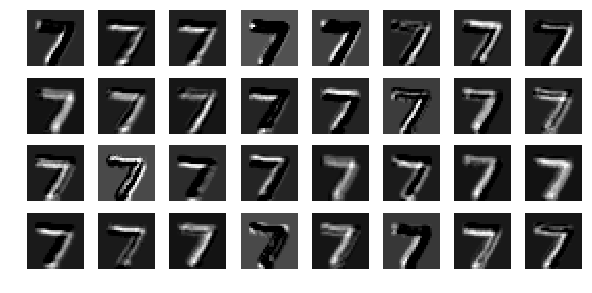

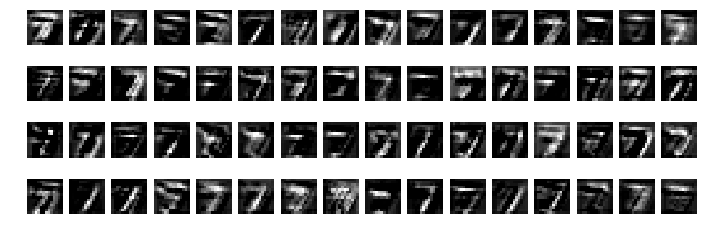

In [42]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, 'net/6_1.ckpt')
    f1, f2 = sess.run([h_conv1, h_conv2], feed_dict={x: mnist.test.images[:1], y: mnist.test.labels[:1], keep_prob: 1.0})
    plt.figure()
    # the feature map of the first conv layer
    for i in range(f1.shape[3]):
        plt.subplot(f1.shape[3] // 8 + 1, 8, i + 1)
        plt.imshow(f1[0, :, :, i])
        plt.axis('off')
    # the feature map of the second conv layer
    plt.figure(figsize=(12, 5))
    for i in range(f2.shape[3]):
        plt.subplot(f2.shape[3] // 16 + 1, 16, i + 1)
        plt.imshow(f2[0, :, :, i])
        plt.axis('off')